In [1]:
import numpy as np
import sys
import os
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def grouped_lineplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df,
                       palette="cubehelix", ax=ax)

    sns.despine(ax=ax, left=True)
    ax.set_title(title,fontsize=24)
    ax.set_ylabel(y,fontsize=24)
    ax.set_xlabel('order',fontsize=24)
    ax.set_ylim(ymin, ymax)
    l = ax.legend(loc='center right', bbox_to_anchor=(1.55, .65), ncol=2,fontsize=24)
    #l.set_title(hue,prop={'size':24})
    ax.tick_params(labelsize=20)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [3]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title, fontsize=24)
    ax.set_ylabel(y, fontsize=20)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=-.5, xmax=3.5, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2, fontsize=16)
    l.set_title(hue,prop={'size':20})
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [4]:
figdir = '../../figs'
if not os.path.isdir(figdir):
    os.mkdir('figs')
figdir = 'figs'

In [5]:
factors = 100

In [6]:
#factor_data_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results_' + str(factors))

In [7]:
factor_data_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results')

In [8]:
analysis_name = 'level_analysis_optimized'

In [9]:
data_dir = os.path.join(factor_data_dir, analysis_name)

In [10]:
data_dir

'/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_optimized'

In [11]:
params =glob.glob(os.path.join(data_dir, '*'))

In [12]:
params

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_optimized/isfc_PCA_mexican_hat_5']

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


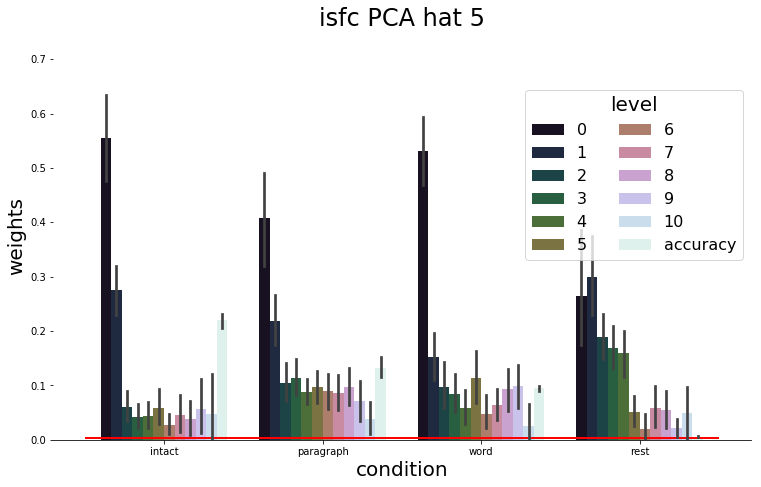

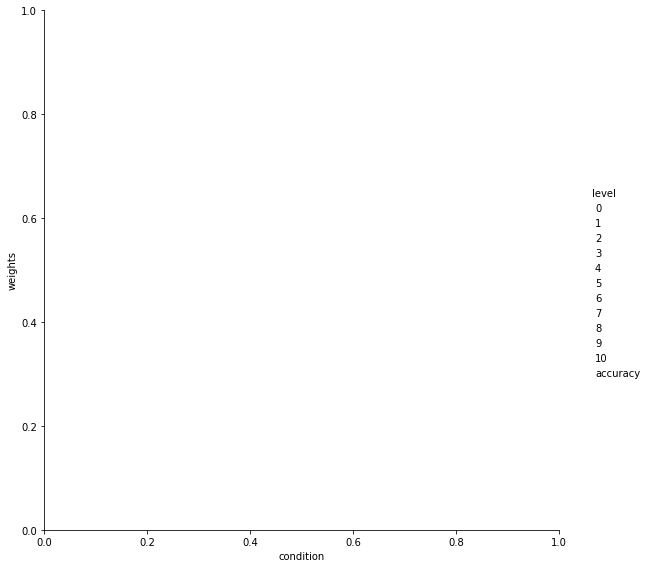

In [13]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(full_data['level'].max() + 2):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['condition'] = full_data['condition']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['condition'] = full_data['condition']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '_'+ str(factors)+ '.pdf')
    grouped_barplot(melted_df, 'condition', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.show()
    plt.close()

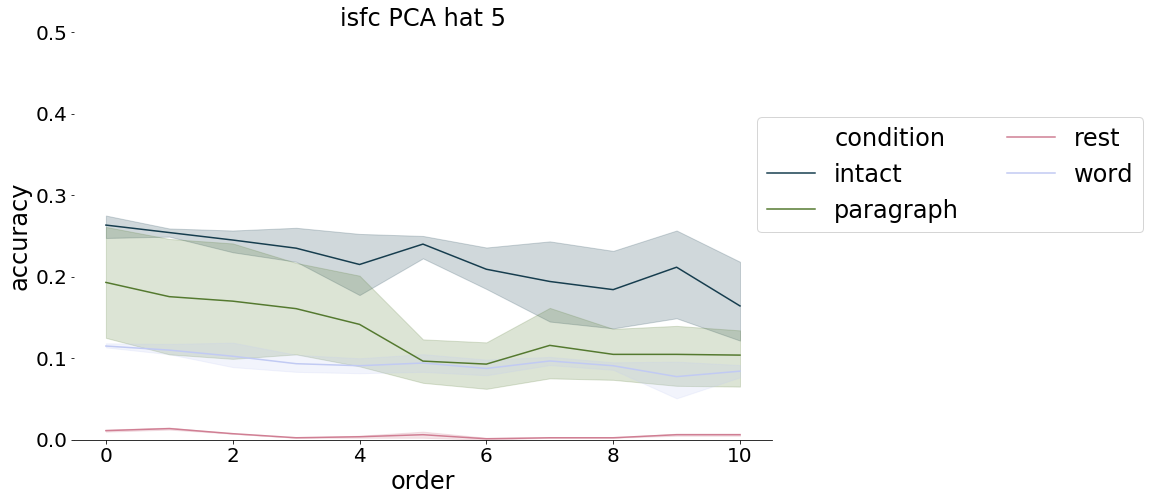

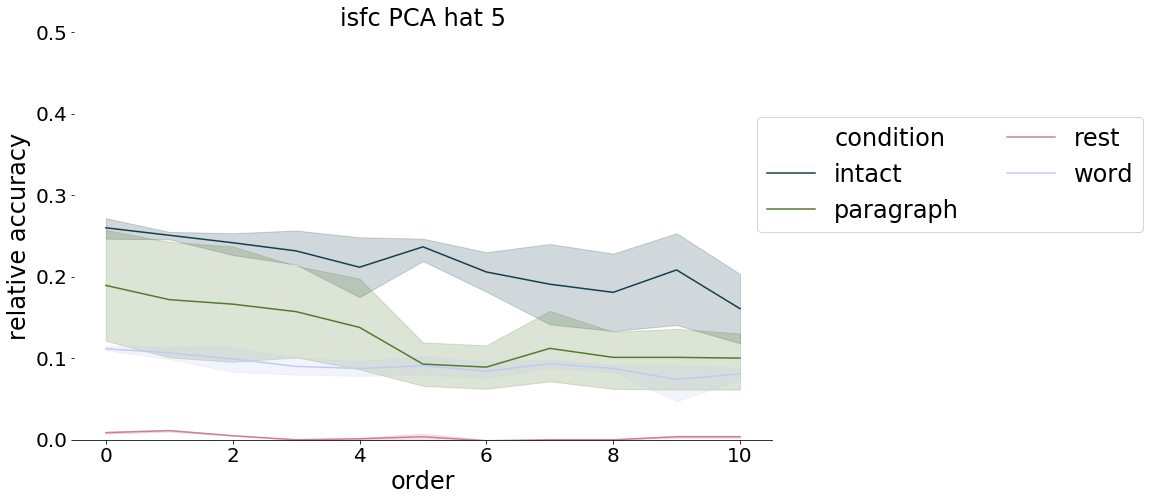

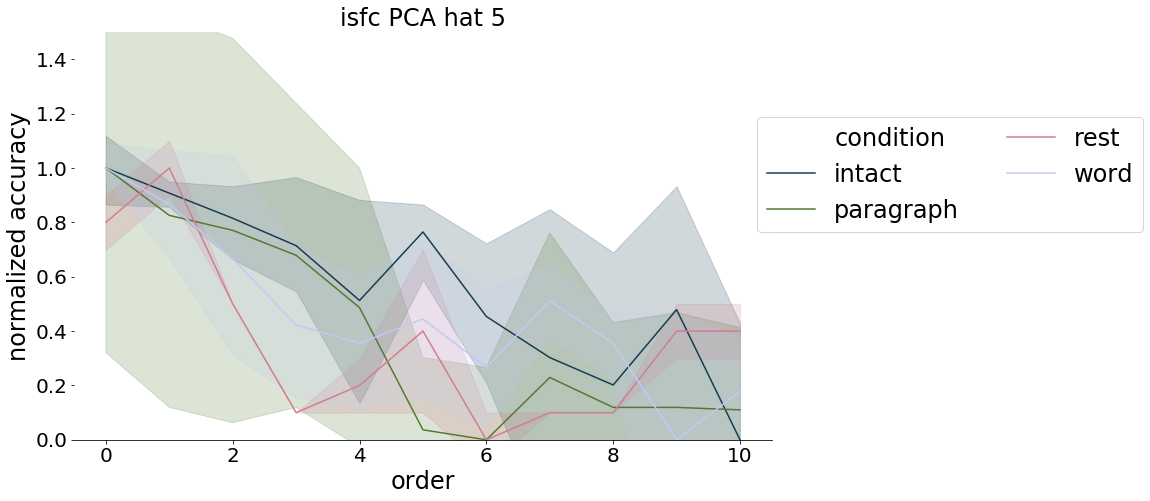

In [14]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        
        cond_name = os.path.basename(os.path.splitext(c)[0])
        chance = 1/300      
        if cond_name == 'paragraph':
            chance = 1/272
        elif cond_name == 'rest':
            chance = 1/400
        
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        #data['level'] = 20 - data.isnull().sum(axis=1)
        data['relative accuracy'] = data['accuracy'] - chance
        data['normalized accuracy']= data['accuracy'] - np.min(data.groupby('level')['accuracy'].mean())
        data['normalized accuracy'] = data['normalized accuracy'] / np.max(data.groupby('level')['normalized accuracy'].mean())
   
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 
    
    outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'level', 'accuracy','condition', ymin=0, ymax=.5, title=title, outfile=outfile)
    plt.show()
    plt.close()
    
    outfile = os.path.join(figdir, param_name + '_relative_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'level', 'relative accuracy','condition', ymin=0, ymax=.5, title=title, outfile=outfile)
    plt.show()
    plt.close()
    
    outfile = os.path.join(figdir, param_name + '_normalized_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'level', 'normalized accuracy','condition', ymin=0, ymax=1.5, title=title, outfile=outfile)
    plt.show()
    plt.close()